In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Paths

In [2]:
# Laila Frisius
rna_data = pd.read_csv("/Users/laila/github/Bioinfo Projekt 25/Raw data/RNA-seq_mmc2.csv")
rna_data.head()

NameError: name 'pd' is not defined

In [4]:
# Kaja von Volkmann
data_folder = 'D:\\Uni\\4. Semester\\Bioinfo\\datasets'
file_name = os.path.join (data_folder, 'processed rna seq data.csv')
rna_data = pd.read_csv(file_name)
#rna_data.head()

## Analysis clean up

In [5]:
print(rna_data.isna().sum().sum())
print((rna_data.iloc[:, 1:] < 1).sum().sum())
numerical_data=rna_data.iloc[:, 1:]
#gesamtsumme berechnen
sample_sums=numerical_data.sum(axis=0)
low_sum_samples=sample_sums[sample_sums <= 100]
print(low_sum_samples)
#varianz berechnen
sample_variance=numerical_data.var(axis=0)
low_variance_samples=sample_variance[sample_variance <= 0.5]
print(low_variance_samples)

0
0
Series([], dtype: float64)
Series([], dtype: float64)


die analyse hat ergeben:  
keine NAs  
keine Werte unter 1  
keine Spalte mit gesamtsumme <= 100  
keine spalte mit varianz <= 0.5

### log 2 transformation

In [9]:
rna_data_log2=rna_data.copy()
rna_data_log2.iloc[:, 1:]=np.log2(rna_data.iloc[:, 1:])

### PCA per Hand

In [ ]:
#ohne gennamen
data=rna_data_log2.iloc[:, 1:]
#auswahl der 1000 variablesten gene
variances=data.var(axis=1)
top_genes=variances.nlargest(1000).index
#transponieren
data_T=data.T
#mittelwertzentrierung?
data_centered=data_T-data_T.mean(axis=0)
# matrix mit Kovarianz
cov_matrix=np.cov(data_centered, rowvar=False)
# Eigenwerte und Eigenvektoren
eig_vals, eig_vecs=np.linalg.eigh(cov_matrix)
# ansteigend sortieren
sorted_idx=np.argsort(eig_vals)[::-1]
eig_vals=eig_vals[sorted_idx]
eig_vecs=eig_vecs[:, sorted_idx]
#ersten zwei PCs
pc1=data_centered @ eig_vecs[:, 0]
pc2=data_centered @ eig_vecs[:, 1]
#plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2)
#achsen labeln
for i, sample in enumerate(data_T.index):
    plt.text(pc1[i] + 0.2, pc2[i], sample, fontsize=9)

plt.xlabel(f"PC1 ({eig_vals[0]/eig_vals.sum()*100:.1f}%)")
plt.ylabel(f"PC2 ({eig_vals[1]/eig_vals.sum()*100:.1f}%)")
plt.title("PCA der RNA-Seq Samples")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# variances=rna_data_log2.iloc[:, 1:].vaaaar(axis=1)
# top_genes=variances.sort_values(ascending=False).head(1000).index
# filtered_data=rna_data_log2.loc[top_genes]
# data=filtered_data.iloc[:, 1:]
# data_centered=data_T-data_T.mean(axis=0)


## PCA

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

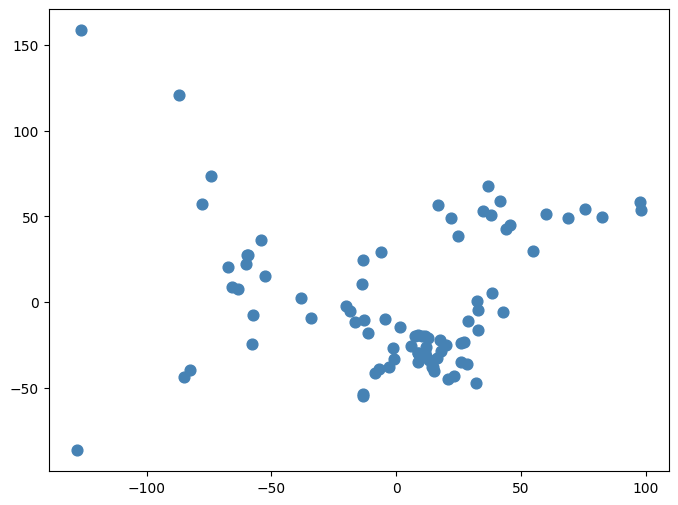

In [25]:
data_folder = 'D:\\Uni\\4. Semester\\Bioinfo\\datasets'
file_name = os.path.join (data_folder, 'processed rna seq data.csv')
rna_data = pd.read_csv(file_name, index_col= 0)
rna_data_T=rna_data.T
scaler=StandardScaler()
scaled_data=scaler.fit_transform(rna_data_T)
pca = PCA(n_components=2)
pca_results=pca.fit_transform(scaled_data)
pca_df=pd.DataFrame(data=pca_results, columns=["PC1", "PC2"])
pca_df["Zelltyp"]=rna_data_T.index
plt.figure(figsize=(8,6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c='steelblue', s=60)

### Correlation heatmap

In [ ]:
data_folder = 'D:\\Uni\\4. Semester\\Bioinfo\\datasets'
file_name = os.path.join (data_folder, 'processed rna seq data.csv')
rna_data = pd.read_csv(file_name, index_col= 0)
rna_data_T=rna_data.T
corr_matrix=rna_data_T.corr(method='pearson')
plt.figure(figsize=(10,8))
corr_heatmap=plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)